In [ ]:
pip --version

pip 24.3.1 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


In [ ]:
pip install --upgrade pip

In [ ]:
!pip install opencv-python


In [ ]:
!pip install opencv-python-headless

In [ ]:
import cv2
print(cv2.__version__)


4.10.0


In [ ]:
# dataset : https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster/code

In [ ]:
import pandas as pd


train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np


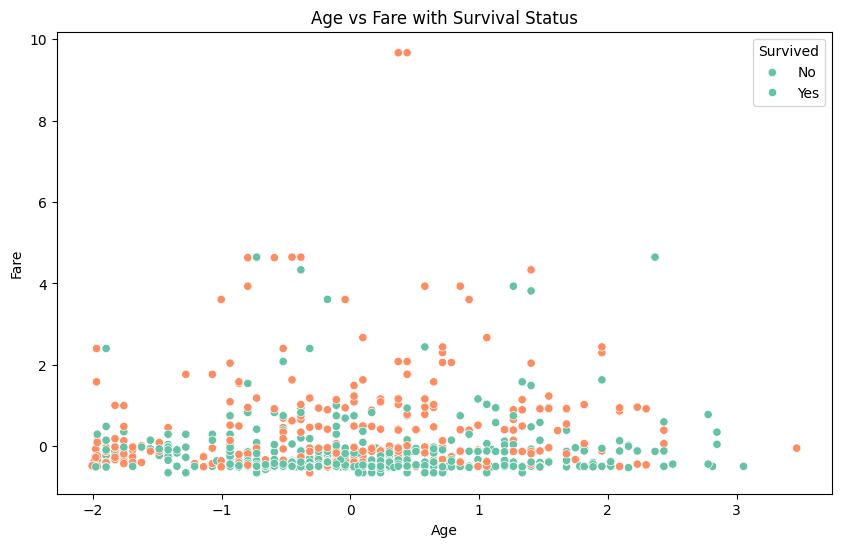

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))

sns.scatterplot(data=train_df, x='Age', y='Fare', hue='Survived', palette='Set2')


plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()




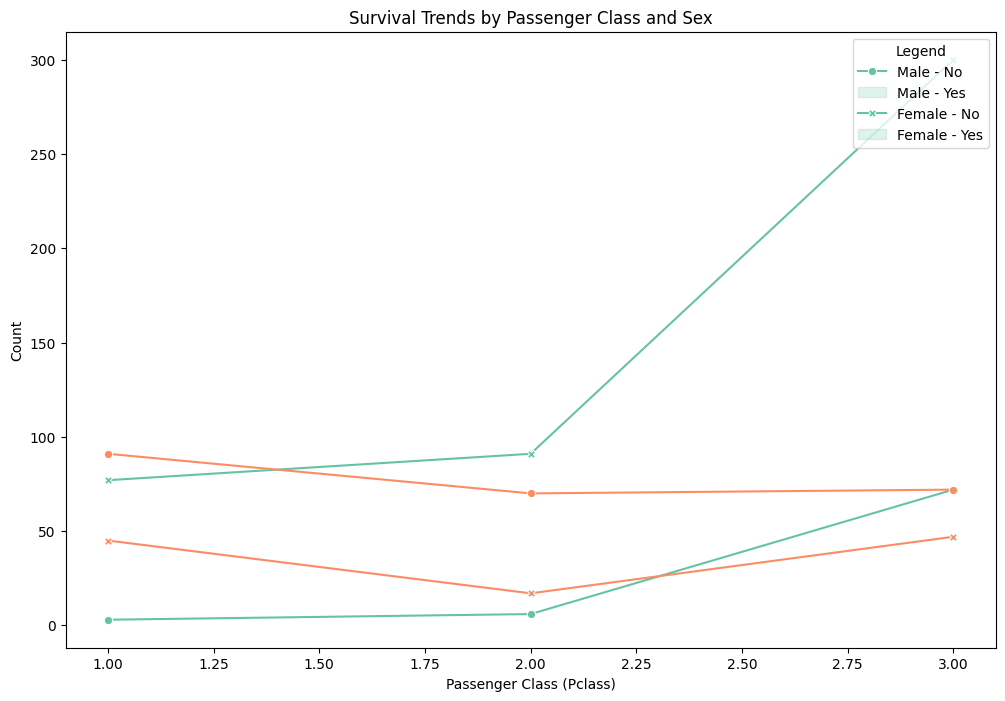

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


grouped_data = train_df.groupby(['Pclass', 'Sex', 'Survived']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=grouped_data,
    x='Pclass',
    y='Count',
    hue='Survived',
    style='Sex',
    markers=True,
    dashes=False,
    palette='Set2'
)

plt.title('Survival Trends by Passenger Class and Sex')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Count')
plt.legend(title='Legend', loc='upper right', labels=['Male - No', 'Male - Yes', 'Female - No', 'Female - Yes'])
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


train_df = train_df.drop(["Name","Ticket","Cabin"], axis=1)


train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Embarked')


train_df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])

scaler = StandardScaler()
train_df[['Age', 'Fare']] = scaler.fit_transform(train_df[['Age', 'Fare']])

print(train_df.head())

   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.521198      1      0 -0.502445   
1            2         1       1    0  0.578729      1      0  0.786845   
2            3         1       3    0 -0.246216      0      0 -0.488854   
3            4         1       1    0  0.372493      1      0  0.420730   
4            5         0       3    1  0.372493      0      0 -0.486337   

   Embarked_C  Embarked_Q  Embarked_S  
0       False       False        True  
1        True       False       False  
2       False       False        True  
3       False       False        True  
4       False       False        True  


In [ ]:
from sklearn.model_selection import train_test_split

X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_val_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_val, lr_pred)}")

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_val)
print(f"Random Forest Accuracy: {accuracy_score(y_val, rf_pred)}")

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_val)
print(f"Gradient Boosting Accuracy: {accuracy_score(y_val, gb_pred)}")

Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8156424581005587
Gradient Boosting Accuracy: 0.8268156424581006


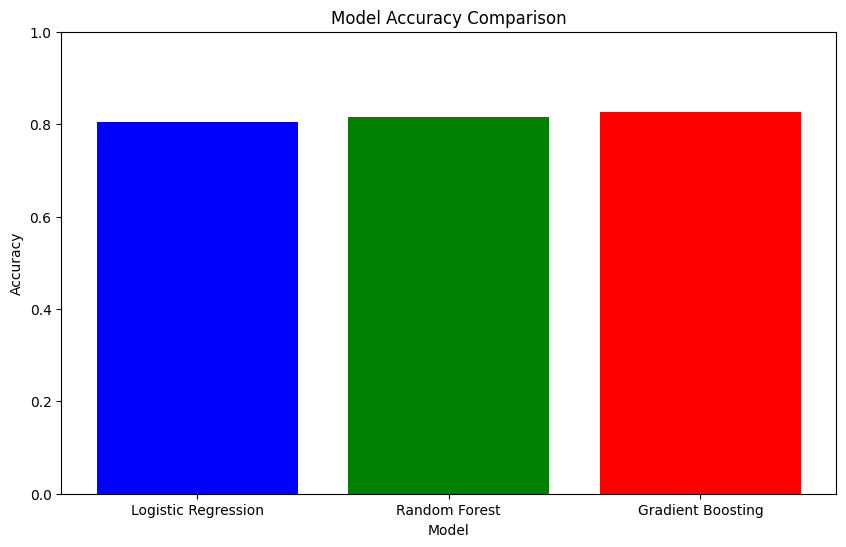

In [ ]:
import matplotlib.pyplot as plt


accuracies = {
    'Logistic Regression': accuracy_score(y_val, lr_pred),
    'Random Forest': accuracy_score(y_val, rf_pred),
    'Gradient Boosting': accuracy_score(y_val, gb_pred)
}


models = list(accuracies.keys())
scores = list(accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['blue', 'green', 'red'])

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_val, lr_pred)}")
print(f"Random Forest Accuracy: {accuracy_score(y_val, rf_pred)}")
print(f"Gradient Boosting Accuracy: {accuracy_score(y_val, gb_pred)}")

Logistic Regression Accuracy: 0.8044692737430168
Random Forest Accuracy: 0.8156424581005587
Gradient Boosting Accuracy: 0.8268156424581006


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best Score: 0.8244065793361568


In [ ]:
import joblib

model_filename = 'trained_model.pkl'
joblib.dump(rf, model_filename)

['trained_model.pkl']

In [ ]:
loaded_model = joblib.load(model_filename)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler


test_df = test_df.drop(["Name","Ticket","Cabin"], axis=1)

test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Embarked')
test_df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])

scaler = StandardScaler()
test_df[['Age', 'Fare']] = scaler.fit_transform(test_df[['Age', 'Fare']])

test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,892,3,1,0.314998,0,0,-0.497071,False,True,False
1,893,3,0,1.214994,1,0,-0.511934,False,False,True
2,894,2,1,2.294989,0,0,-0.463762,False,True,False
3,895,3,1,-0.224999,0,0,-0.482135,False,False,True
4,896,3,0,-0.584997,1,1,-0.417159,False,False,True


In [ ]:
X_new_test = test_df[loaded_model.feature_names_in_]

predictions = loaded_model.predict(X_new_test)

test_df['Survived'] = predictions
print(test_df[0:10].to_string())

test_df[["PassengerId", "Survived"]].to_csv("output.csv", index=False)

   PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_C  Embarked_Q  Embarked_S  Survived
0          892       3    1  0.314998      0      0 -0.497071       False        True       False         0
1          893       3    0  1.214994      1      0 -0.511934       False       False        True         0
2          894       2    1  2.294989      0      0 -0.463762       False        True       False         0
3          895       3    1 -0.224999      0      0 -0.482135       False       False        True         0
4          896       3    0 -0.584997      1      1 -0.417159       False       False        True         0
5          897       3    1 -1.160994      0      0 -0.472052       False       False        True         0
6          898       3    0 -0.009000      0      0 -0.500656       False        True       False         1
7          899       2    1 -0.296999      1      1 -0.117599       False       False        True         0
8          900       3    0 

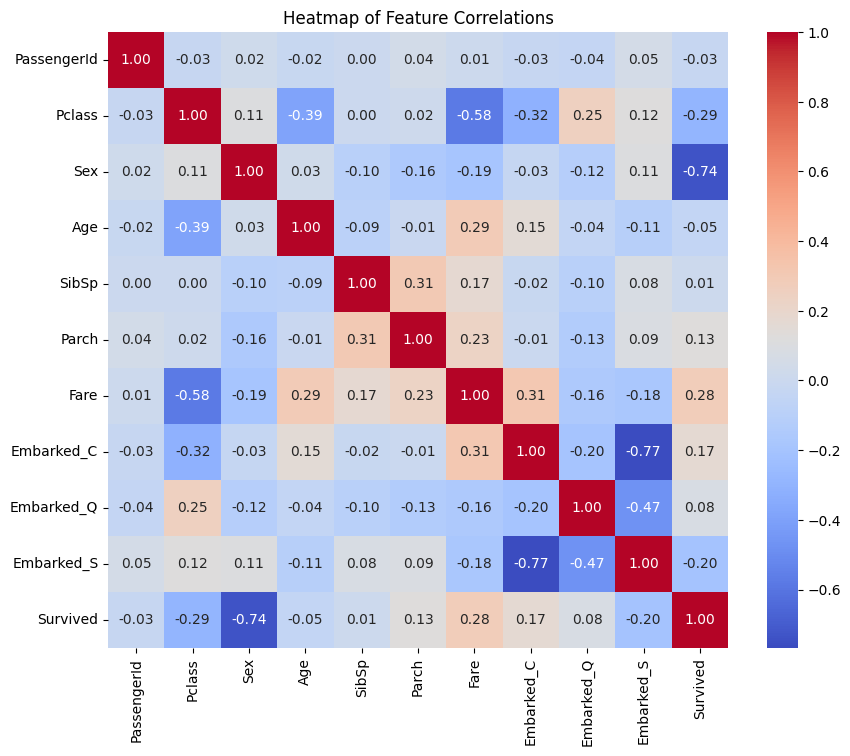

In [ ]:

test_df['Embarked_C'] = test_df['Embarked_C'].astype(int)
test_df['Embarked_Q'] = test_df['Embarked_Q'].astype(int)
test_df['Embarked_S'] = test_df['Embarked_S'].astype(int)

plt.figure(figsize=(10, 8))
correlation_matrix = test_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title("Heatmap of Feature Correlations")
plt.show()

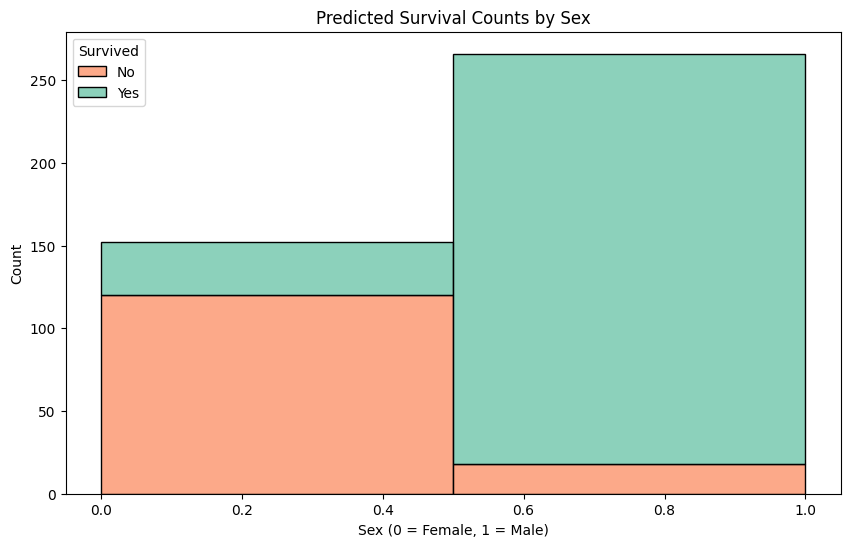

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(
    data=test_df,
    x='Sex',
    hue='Survived',
    multiple='stack',
    palette='Set2',
    bins=2,
    kde=False

plt.title('Predicted Survival Counts by Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


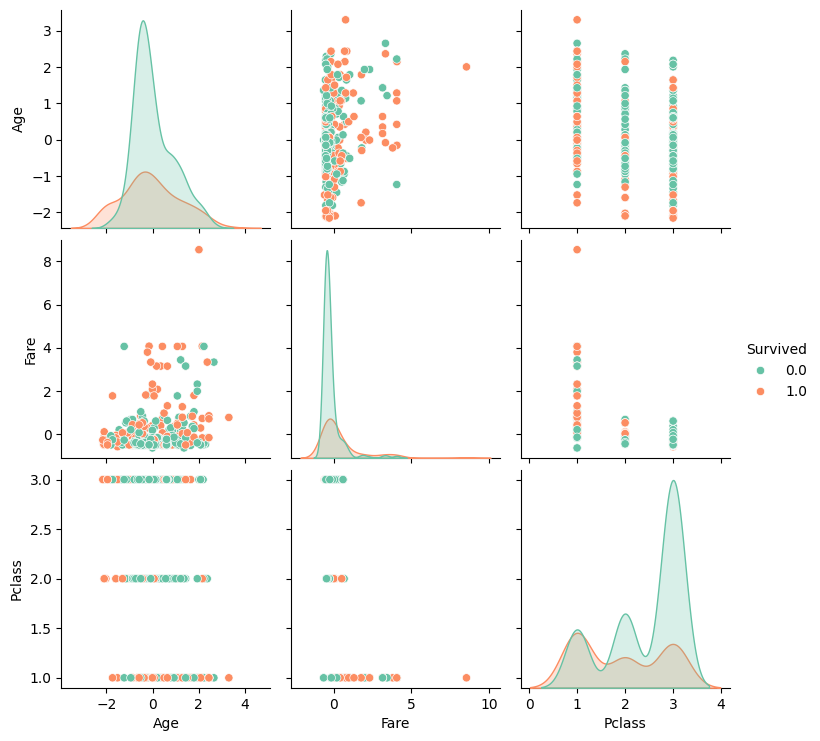

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


embarked_df = test_df.melt(
    id_vars=['Survived'],
    value_vars=['Embarked_C', 'Embarked_Q', 'Embarked_S'],
    var_name='Embarked', value_name='Embarked_Flag'
)


embarked_df = embarked_df[embarked_df['Embarked_Flag'] == True]


merged_df = pd.concat([test_df[['Age', 'Fare', 'Pclass', 'Survived']], embarked_df[['Embarked']]], axis=1)


merged_df['Embarked'] = merged_df['Embarked'].str[-1]
merged_df['Survived'] = merged_df['Survived'].astype('category')


sns.pairplot(
    merged_df,
    vars=['Age', 'Fare', 'Pclass'],
    hue='Survived',
    palette='Set2',
    diag_kind='kde'
)

plt.show()


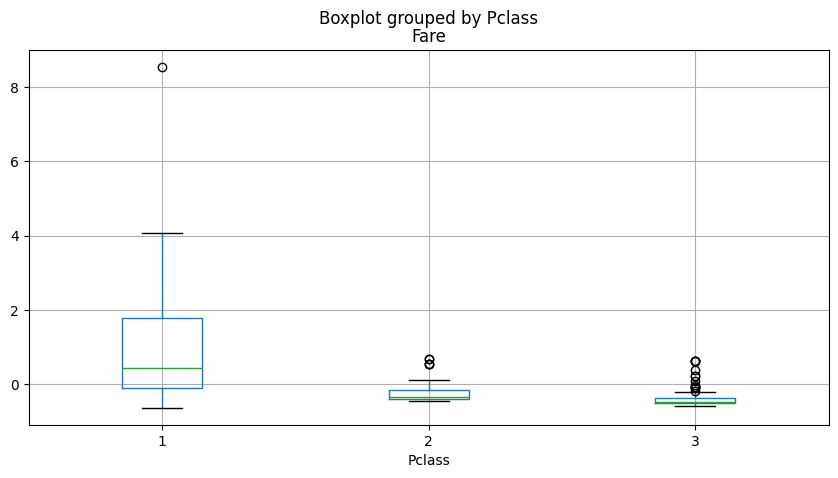

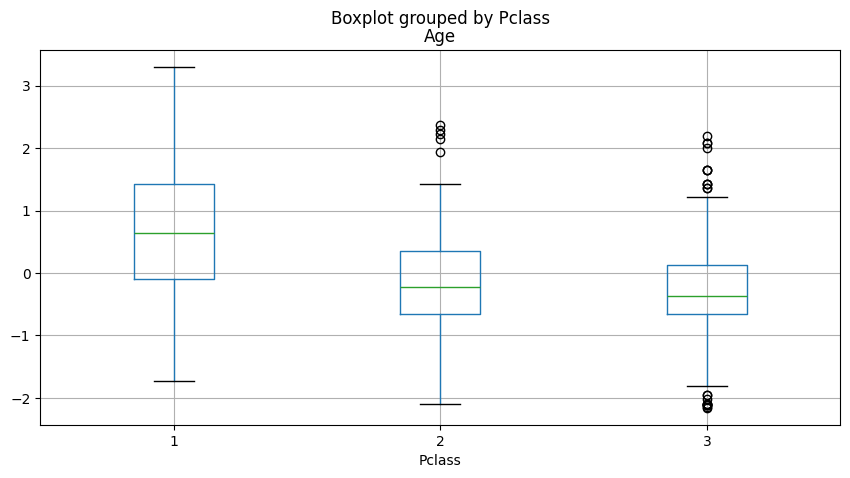

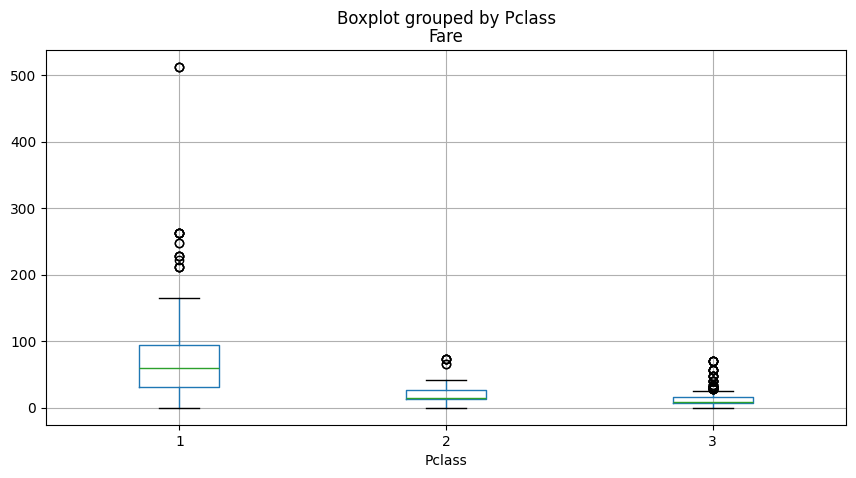

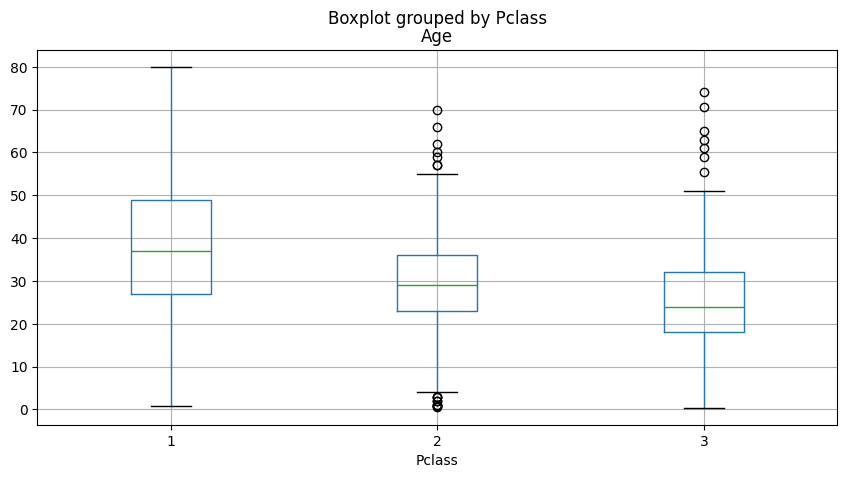

In [ ]:

for i in ['Fare', 'Age']:
    test_df.boxplot(column=i, by='Pclass', figsize=[10, 5])
import pandas as pd


test_df = pd.read_csv('/content/test.csv')
test_df = pd.read_csv('/content/train.csv')

for i in ['Fare', 'Age']:
    test_df.boxplot(column=i, by='Pclass', figsize=[10, 5])


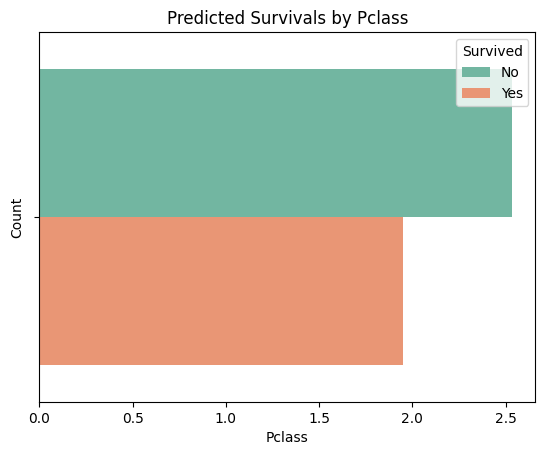

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(data=test_df, x='Pclass', hue='Survived', ci=None, palette='Set2')

plt.title('Predicted Survivals by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()


In [ ]:
import time

start_time = time.time()

for i in range(10000000):
    pass

end_time = time.time()

total_time = end_time - start_time

hours, rem = divmod(total_time, 3600)
minutes, seconds = divmod(rem, 60)

print(f"Total Runtime: {int(hours):02}:{int(minutes):02}:{int(seconds):02}")


Total Runtime: 00:00:00
